In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import display
# pd.set_option('display.max_rows', 100)
sns.set(font_scale=2.5)

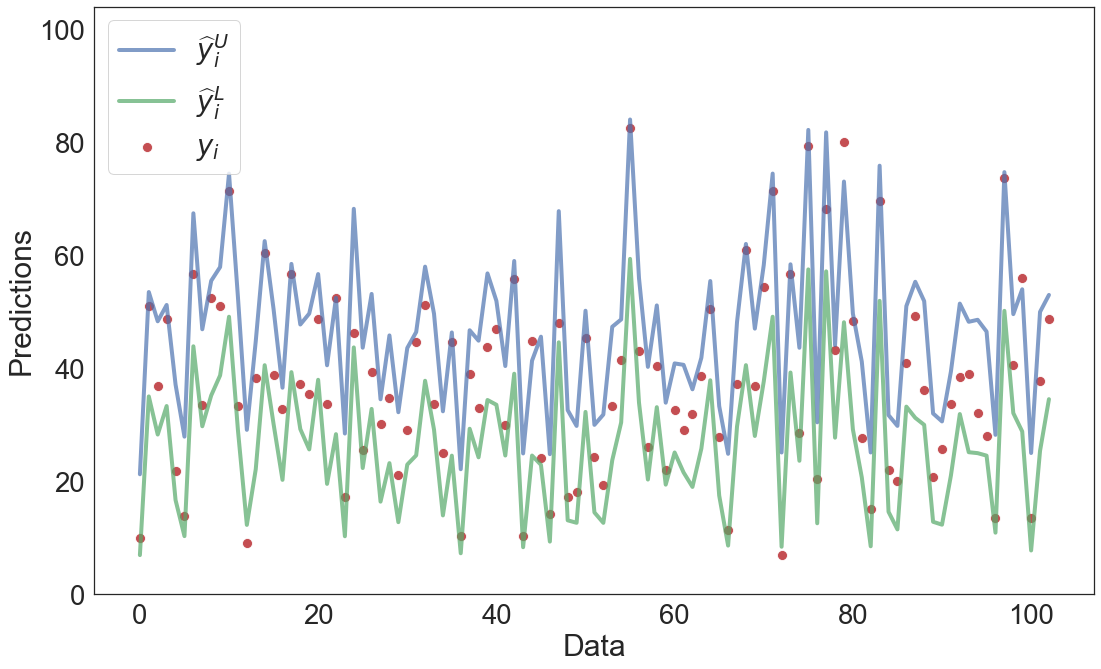

In [18]:
# df = pd.read_csv('4_Concrete_Data_PCGrad_pred.csv')
# fig = plt.figure(figsize=(16,10))
# sns.set(font_scale=2.5)
# sns.set_style("white")
# plt.ylabel("Predictions")
# plt.xlabel("Data")
# sns.lineplot(data=df['Upperbound'], color = 'b', label = r'$\widehat {y}_i^U$', linewidth = 4, alpha = 0.7)
# sns.lineplot(data=df['Lowerbound'], color = 'g', label = r'$\widehat {y}_i^L$', linewidth = 4, alpha = 0.7)
# sns.scatterplot(data=df['y_true'],  color = 'r', label = r'$y_i$',s=100)
# plt.ylim([0, 104])
# plt.legend(loc='upper left')
# fig.tight_layout()
# plt.savefig('Prediction_values.pdf')

In [5]:
df_up = pd.read_csv('up_weights.csv', header= None)
df_up_biases = pd.read_csv('up_weights_biases.csv', header = None)
df_up_biases = df_up_biases.T 

df_upper_bound = pd.concat([df_up, df_up_biases], axis = 0)

df_low = pd.read_csv('lb_weights.csv', header= None)
df_lb_biases = pd.read_csv('lb_weights_biases.csv', header = None)
df_lb_biases = df_lb_biases.T 

df_lower_bound = pd.concat([df_low, df_lb_biases], axis = 0)


# upper and lower bound weights 
up_low_bound_weights = pd.concat([df_lower_bound, df_upper_bound],axis = 0)
up_low_bound_weights = up_low_bound_weights.to_numpy().flatten()
up_low_bound_weights.shape

(16512,)

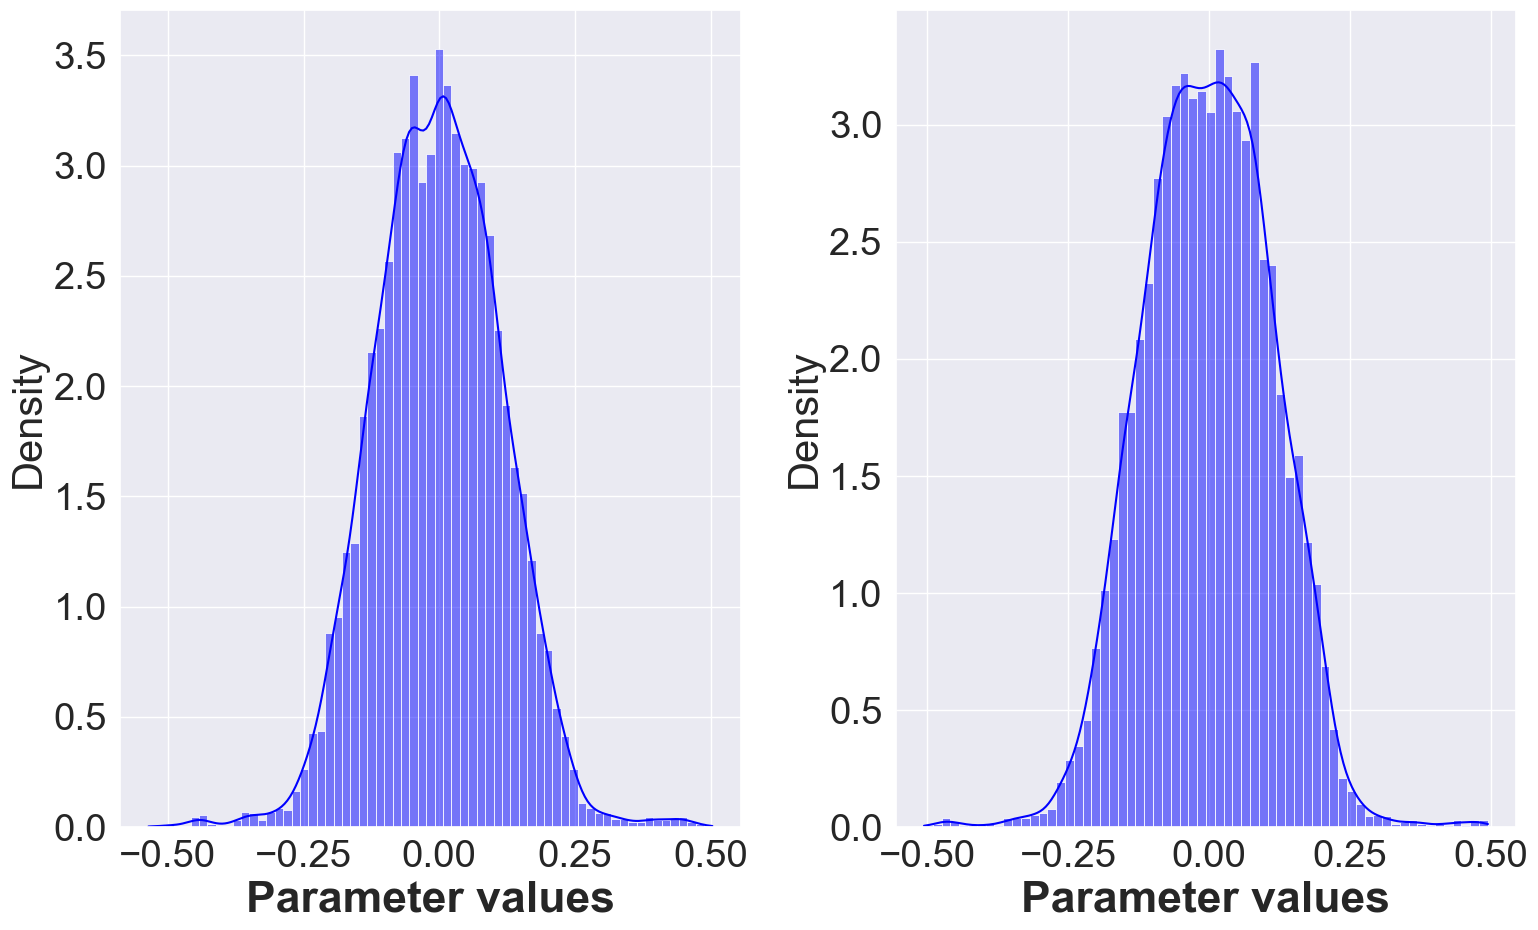

In [6]:
df_upper_bound  = df_upper_bound.to_numpy().flatten()
df_lower_bound = df_lower_bound.to_numpy().flatten()

fig, axs = plt.subplots(ncols=2, figsize=(16, 10))
sns.set(font_scale=2.5)
sns.set_style("white")
sns.histplot(data= df_upper_bound, kde=True, stat='density', ax=axs[0], label = 'Upper_bound_weights', color = 'blue')

sns.histplot(data= df_lower_bound, kde=True, stat='density', ax=axs[1], label = 'Lower_bound_weights', color = 'blue')

axs[0].set_xlabel('Parameter values', fontsize = 32, fontweight='bold')
axs[1].set_xlabel('Parameter values', fontsize = 32, fontweight='bold')
fig.tight_layout()
plt.savefig('Lower_Upper_Distribution.pdf')
plt.show() 

In [7]:
mid1_weights = pd.read_csv('mid1_weights.csv', header= None)
mid1_weights_biases = pd.read_csv('mid1_weights_biases.csv', header = None)
mid1_weights_biases = mid1_weights_biases.T 
mid1 = pd.concat([mid1_weights, mid1_weights_biases], axis = 0)

In [8]:
mid2_weights = pd.read_csv('mid2_weights.csv', header= None)
mid2_weights_biases = pd.read_csv('mid2_weights_biases.csv', header = None)
mid2_weights_biases = mid2_weights_biases.T 
mid2 = pd.concat([mid2_weights, mid2_weights_biases], axis = 0)

mid = pd.concat([mid1, mid2], axis = 0)
mid = mid.to_numpy().flatten()
mid = mid.reshape(-1)
mid.shape

(17664,)

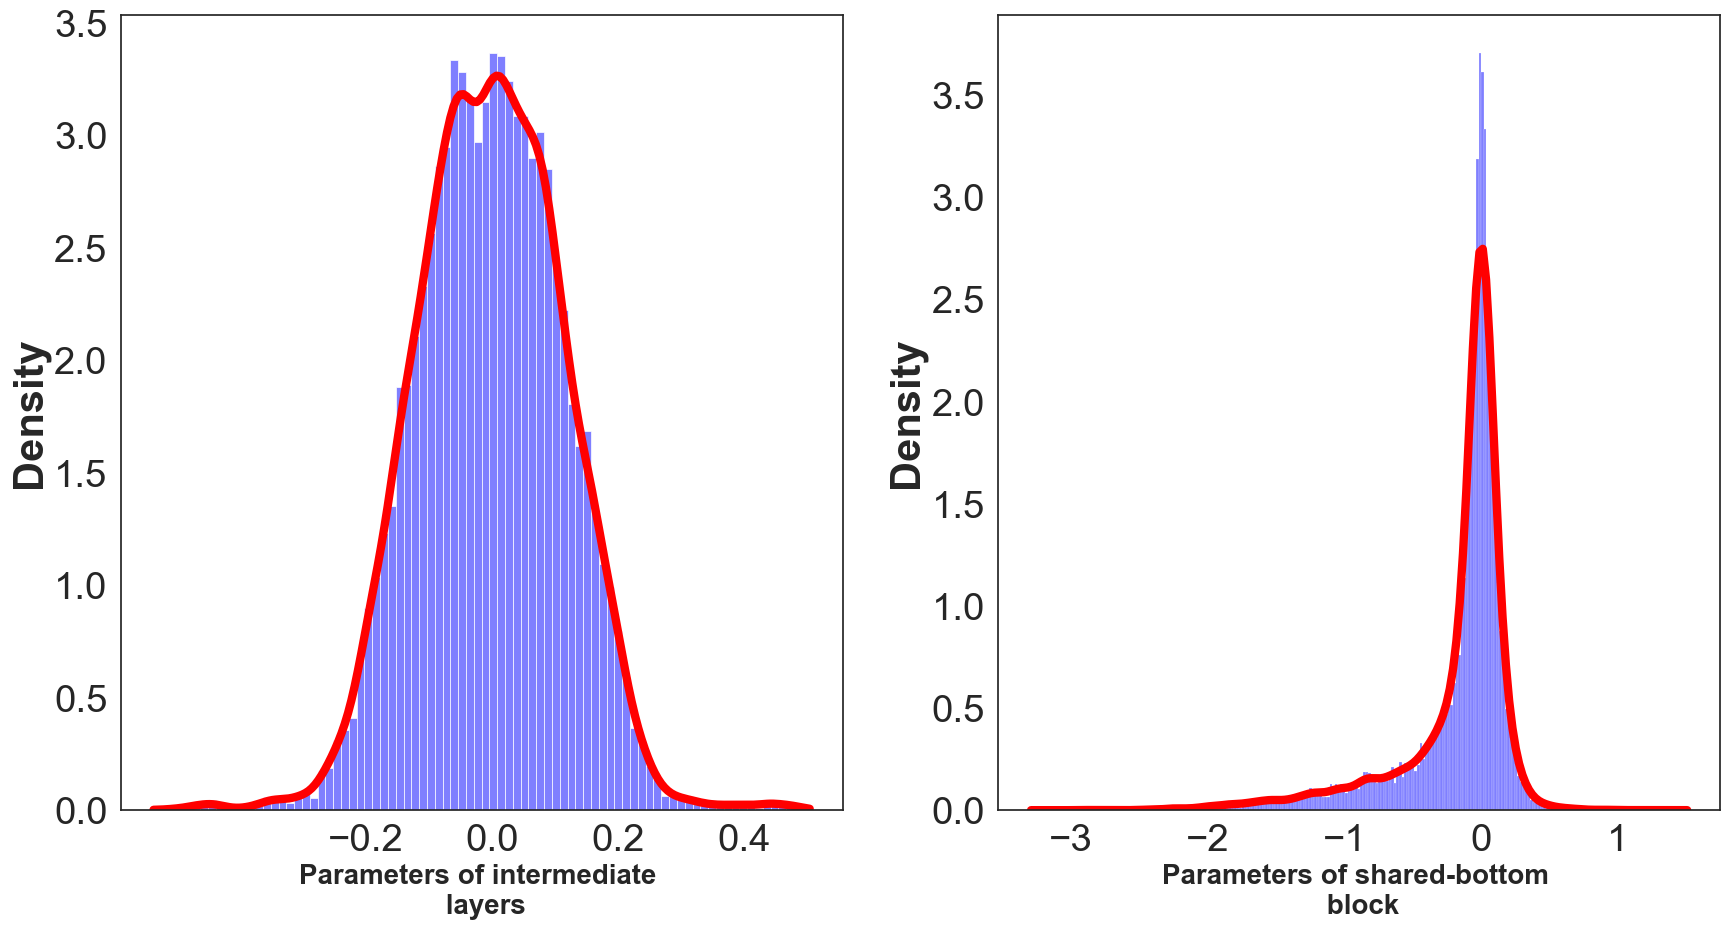

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(18, 10))
sns.set(font_scale=2.5)
sns.set_style("white")
axs[0] = sns.histplot(data= up_low_bound_weights, kde=True, stat='density', ax=axs[0], label = 'up_low_bound_weights', color = 'blue')
axs[1] = sns.histplot(data= mid, kde=True, stat='density', ax=axs[1], label = 'mid_weights', color = 'blue')
axs[0].lines[0].set_color('red')
axs[1].lines[0].set_color('red')

axs[0].lines[0].set_linewidth('6')
axs[1].lines[0].set_linewidth('6')

axs[0].set_xlabel('Parameters of intermediate \n layers', fontsize = 20, fontweight='bold')
axs[1].set_xlabel('Parameters of shared-bottom \n block', fontsize = 20, fontweight='bold')

axs[0].set_ylabel('Density',fontsize = 30, fontweight='bold')

axs[0].set_xticks(np.arange(-0.2, 0.4, step=0.2))

axs[1].set_ylabel('Density', fontsize = 30, fontweight='bold')

# axs[1].set_xticks(np.arange(-0.2, 0.4, step=0.2))
#axs[1].set_yticks(fontsize=28)

fig.tight_layout()

# Shown in the paper 
plt.savefig('DIFF.pdf')
plt.show() 

In [15]:
'''
Under the null hypothesis the two distributions are identical. 

If the K-S statistic is small or the p-value is high (greater than the significance level, say 5%), 
then we can not reject the hypothesis that the distributions of the two samples are the same. 

Conversely, we can reject the null hypothesis if the p-value is low.'''

from scipy.stats import ks_2samp
import numpy as np

ks_2samp(mid, up_low_bound_weights)


KstestResult(statistic=0.2179534778395686, pvalue=0.0, statistic_location=-0.21750364, statistic_sign=1)